In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pickle

In [2]:
data = pd.read_csv("C:\\Users\\extre\\Downloads\\Telegram Desktop\\titanic (2).csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data = data[['Survived', 'Sex', 'Age', 'SibSp', 'Fare']]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [8]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
data.loc[data["Sex"]=="male", "gender"]=0
data.loc[data["Sex"]=="female","gender"]=1

C:\Users\extre\AppData\Local\Temp\ipykernel_231532\3924149105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data["Sex"]=="male", "gender"]=0


In [10]:
data=data.drop(['Sex'],axis=1)

<Axes: xlabel='Age', ylabel='Fare'>

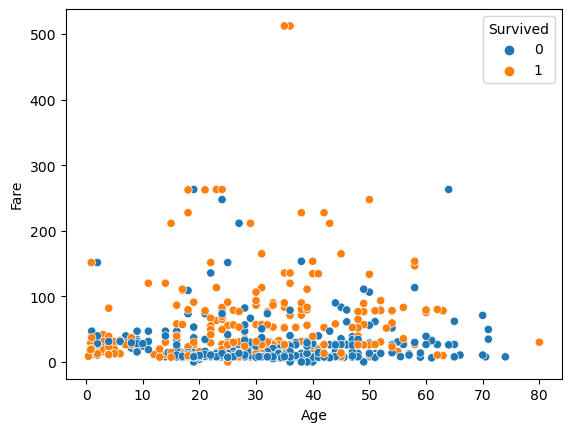

In [11]:
sns.scatterplot(
    x='Age',
    y='Fare',
    hue='Survived',
    data=data)

In [12]:
data['Age'].fillna(data.Age.mean(), inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Fare      891 non-null    float64
 4   gender    891 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 34.9 KB


In [14]:
X=data.drop(['Survived'],axis=1)
y=data.Survived

# Нормализация данных(StandardScaler)

In [15]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.20, random_state = 0)

In [16]:
sc = StandardScaler() 
X_train = sc.fit_transform (X_train) 
X_test = sc.transform (X_test)

## KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
  # Calculate the accuracy of the model
print(knn.score(X_test, y_test))

0.7988826815642458


In [18]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

KNeighborsClassifier()

In [19]:
y_pred = knn.predict (X_test)

In [20]:
cm = confusion_matrix (y_test, y_pred) 
print(cm)

[[96 14]
 [22 47]]


In [21]:
new_candidates = {'Age': [18,27,50,45,30],
                  'SibSp': [1,1,0,1,0],
                  'Fare': [7000,30000,5000,6000,18000],
                  'gender': [0,0,0,1,0]}

data2 = pd.DataFrame(new_candidates,columns= ['Age', 'SibSp', 'Fare', 'gender'])
y_predict=knn.predict(data2)

print (y_predict)

[1 1 1 1 1]


C:\Users\extre\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


## Error Rate K Value:

In [22]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

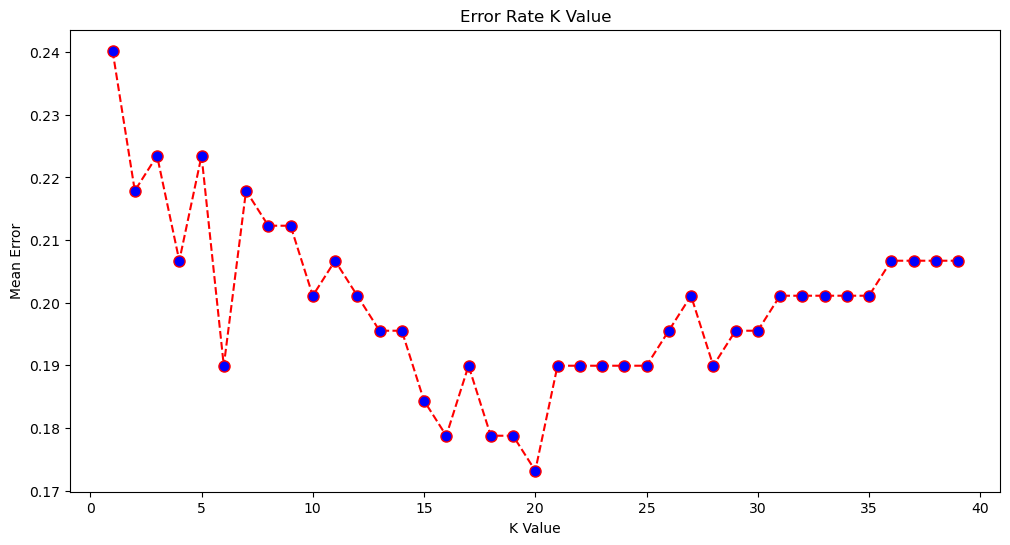

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=8)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# LogisticRegression

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=590)

In [25]:
logreg=LogisticRegression()

In [26]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_pred = logreg.predict(X_test)

In [28]:
LogRegAccur = metrics.accuracy_score(y_test,y_pred)

In [29]:
cnf_matrix = confusion_matrix (y_test, y_pred) 

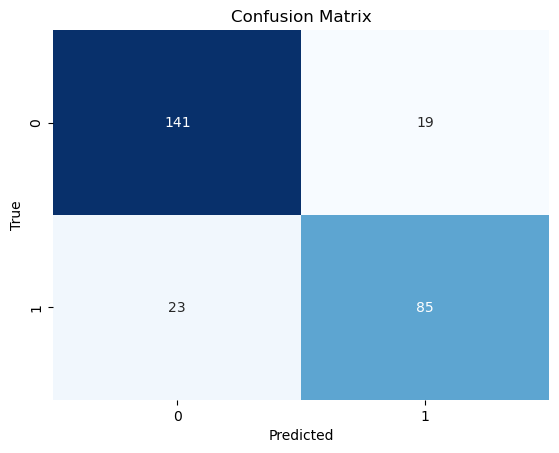

In [30]:
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [31]:
metrics.roc_auc_score(y_test, y_pred)

0.8341435185185185

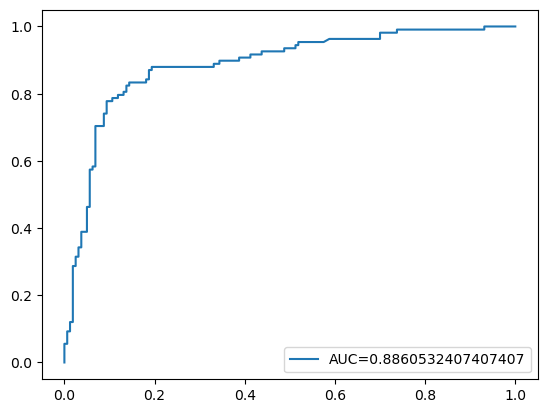

In [32]:
#plot ROC curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       160
           1       0.82      0.79      0.80       108

    accuracy                           0.84       268
   macro avg       0.84      0.83      0.84       268
weighted avg       0.84      0.84      0.84       268



### DecisionTree Classifier

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=590)

In [35]:
model_tree = DecisionTreeClassifier(max_depth=1)
model_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=1)

In [36]:
y_predict = model_tree.predict(X_test)

In [37]:
print (accuracy_score(y_test,y_predict))

0.8432835820895522


In [38]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       160
           1       0.83      0.77      0.80       108

    accuracy                           0.84       268
   macro avg       0.84      0.83      0.84       268
weighted avg       0.84      0.84      0.84       268



# 1st boosting algorithm:
# RandomForest

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=590)

In [40]:
forest =  RandomForestClassifier()

forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
forestacc = accuracy_score(y_test,y_predict)
print("Forest Accuracy: %.3f"% forestacc)

Forest Accuracy: 0.836


In [41]:
forest1 =  RandomForestClassifier(criterion='gini', n_estimators = 5, random_state = 1, n_jobs = 2)
forest1.fit(X_train, y_train)
y_predict = forest1.predict(X_test)  
forest1auc = metrics.roc_auc_score(y_test,y_predict)
print(forest1auc)

0.8123842592592593


In [42]:
#forest =  RandomForestClassifier()
y_predict=forest.predict([[18, 1, 7000, 0]])

print (y_predict)

[0]


C:\Users\extre\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [43]:
#forest1 =  RandomForestClassifier(criterion='gini', n_estimators = 5, random_state = 1, n_jobs = 2)
new_candidates = {'gender': [0,0,0,1,0],
                  'Age': [18,27,50,45,30],
                  'SibSp': [1,1,0,1,0],
                  'Fare': [7000,30000,5000,6000,18000] }

data2 = pd.DataFrame(new_candidates,columns= ['Age', 'SibSp', 'Fare', 'gender'])
y_pred=forest1.predict(data2)

print (data2)
print (y_pred)

   Age  SibSp   Fare  gender
0   18      1   7000       0
1   27      1  30000       0
2   50      0   5000       0
3   45      1   6000       1
4   30      0  18000       0
[1 1 0 1 1]


In [44]:
models = {
    "Titanic_ModelTree.pkl": model_tree,
    "Titanic_Forest.pkl": forest,
    "Titanic_Forest(par).pkl": forest1,
    "Titanic_KNN.pkl": knn,
    "Titanic_LogReg.pkl": logreg,
}

for filename, model in models.items():
    with open(filename, "wb") as pickle_out:
        pickle.dump(model, pickle_out)